In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [2]:
def potential(v):
    q1 = 5e-10
    x1 = 40
    y1 = 40
    k= 9*10**9
    for i in range(N):
        for j in range(N):
            if not i == x1 or not j == y1 :
                r1 = ((i-x1)**2+(j-y1)**2)**.5

                v[i][j] = k * q1 / r1
            else:
                v[i][j] = k * q1 / 1
    q2 = 5e-10
    x2 = 65
    y2 = 100
                
    for i in range(N):
        for j in range(N):
            if not i == x2 or not j == y2 :
                r2 = ((i-x2)**2+(j-y2)**2)**.5

                v[i][j] = v[i][j] + k * q2 / r2
            else:
                v[i][j] = v[i][j] + k * q2 / 1
    
    q3 = 5e-10
    x3 = 100
    y3 = 60
                
    for i in range(N):
        for j in range(N):
            if not i == x3 or not j == y3 :
                r3 = ((i-x3)**2+(j-y3)**2)**.5

                v[i][j] = v[i][j] + k * q3 / r3
            else:
                v[i][j] = v[i][j] + k * q3 / 1
            
    return v

In [3]:
def lanczos(v0,m,q):
    w = []
    beta = [0]
    v = [v0]
    wp = []
    alpha = []
    w0p = Hx(v0, q, phi)
    wp.append(w0p)
    alpha0 = np.conj(w0p.T) @ v0
    alpha.append(alpha0)
    w0 = w0p - alpha0 * v0
    w.append(w0)
    for j in range(1,m):
        betaj = np.linalg.norm(w[j-1])
        beta.append(betaj)
        vj = w[j-1]/beta[j]
        v.append(vj)
        wjp = Hx(v[j], q, phi)
        wp.append(wjp)
        alphaj = np.conj(wp[j].T) @ v[j]
        alpha.append(alphaj)
        wj = wp[j] - alpha[j] * v[j] - beta[j] * v[j-1]
        w.append(wj)   
        
    v = np.array(v)
    V = v.T
    Teigenvals, Teigenvecs = eigh_tridiagonal(alpha,beta[1:])
    groundstate_eigenval = Teigenvals[0]
    groundstate_eigenvec = Teigenvecs[:,0]
    print(groundstate_eigenval)
    return V @ groundstate_eigenvec   
    
    
    
    

In [4]:
N = 128
xy1 = np.mgrid[0:N,0:N]
xy = xy1.reshape(2,-1)
xp = np.roll(xy1,-1,axis=1).reshape(2,-1)
xm = np.roll(xy1,1,axis=1).reshape(2,-1)
yp = np.roll(xy1,-1,axis=2).reshape(2,-1)
ym = np.roll(xy1,1,axis=2).reshape(2,-1)

def Hx(x,q,phi):

    x = x.reshape(int(np.sqrt(len(x))),-1)
    ax = np.zeros(x.shape)


    ax[xy[0,:],xy[1,:]] = -(-4*x[xy[0,:],xy[1,:]] + x[xp[0,:],xp[1,:]] + x[xm[0,:],xm[1,:]] +  x[yp[0,:],yp[1,:]] + x[ym[0,:],ym[1,:]])+q*phi[xy[0,:],xy[1,:]]*x[xy[0,:],xy[1,:]] 

    #reset boundary
    ax[0,:] = 0
    ax[:,0] = 0
    ax[N-1,:] = 0
    ax[:,N-1] = 0

    return ax.flatten()

    

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


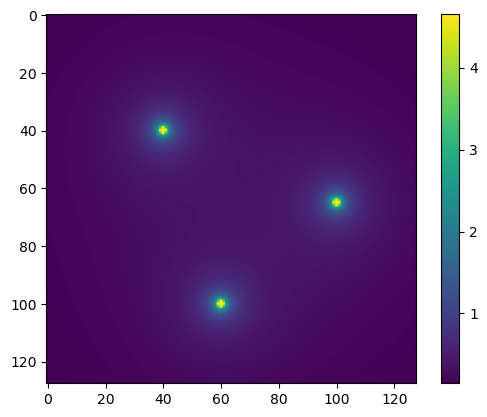

In [5]:
#Creating potential
phi = np.ones((N,N))
phi = potential(phi)

plt.style.use('default')
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
               
Z = phi[X][Y]
fig, ax = plt.subplots()

plt.imshow(Z)
plt.colorbar()
plt.show()


In [6]:
#Create starting v0
v0 = np.ones((N,N))
v0 = potential(v0)
v0 = v0/np.linalg.norm(v0)
v0 = v0.flatten()

In [7]:
charge = -.01
iterations = 30

for i in range(iterations):
    
    result = lanczos(v0,10,charge)
    v0 = result/np.linalg.norm(result)


-0.0019984715173044444
-0.003531226913891093
-0.003766070315006323
-0.003831826574459815
-0.003835546293855423
-0.0038475393755527227
-0.003838462549016089
-0.0038484877900140787
-0.003838099302832488
-0.0038486443442670264
-0.0038370183456622924
-0.003847531907825871
-0.0038347907710563566
-0.0038447686237706165
-0.003831118379842054
-0.003840190422653101
-0.003825806548182651
-0.003833680841494916
-0.0038187204298173096
-0.0038251606832908993
-0.0038098368812822633
-0.0038146866839692227
-0.003799372234291149
-0.0038026052459722154
-0.0037879518131085435
-0.003789722827030816
-0.0037767522235672146
-0.0037774347779542506
-0.0037673603176337465
-0.003767478311143255


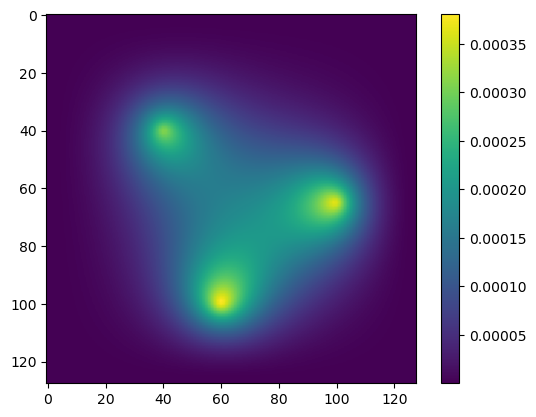

In [8]:
wavefunction = np.reshape(v0, (N,N))
X=np.linspace(0,N-1,N)
Y=np.linspace(0,N-1,N)
X=X.astype(int)
Y=Y.astype(int)
                   
wavefunction = wavefunction[X][Y]
fig, ax = plt.subplots()

plt.imshow(wavefunction**2)
plt.colorbar()
plt.show()
